In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('new.xlsx',index_col=None, engine='openpyxl')
df.rename(columns={'pm10_concentration': 'pm10', 'pm25_concentration': 'pm25', 'no2_concentration': 'no2'}, inplace=True)


In [84]:
print(df.head())


  who_region iso3 country_name          city    year  \
0      4_Eur  ESP        Spain  A Coruna/ESP  2013.0   
1      4_Eur  ESP        Spain  A Coruna/ESP  2014.0   
2      4_Eur  ESP        Spain  A Coruna/ESP  2015.0   
3      4_Eur  ESP        Spain  A Coruna/ESP  2016.0   
4      4_Eur  ESP        Spain  A Coruna/ESP  2017.0   

                                             version    pm10    pm25     no2  \
0  V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...  23.238  11.491  28.841   
1           V6.0  (2023), V6.0  (2023), V6.0  (2023)  27.476  15.878  19.575   
2  V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...  25.515  14.004  22.731   
3  V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...  23.057  13.160  20.204   
4  V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...  26.849  14.114  21.543   

   pm10_tempcov  pm25_tempcov  no2_tempcov                  type_of_stations  \
0          87.0          46.0         93.0            Urban, Urban, Suburban   
1          96.0       

In [85]:
print(df.describe())


               year          pm10          pm25           no2  pm10_tempcov  \
count  40095.000000  28672.000000  21730.000000  26934.000000  22403.000000   
mean    2016.232672     30.016375     19.130923     18.861620     88.732134   
std        3.116678     29.548575     17.490027     25.845061     20.277271   
min     2010.000000      0.730000      1.000000      0.002000      0.000000   
25%     2014.000000     16.264750      8.603250     10.163250     90.000000   
50%     2016.000000     21.335500     12.710500     16.700000     96.000000   
75%     2019.000000     30.515500     23.000000     24.911500     99.000000   
max     2022.000000    540.000000    436.440000   3670.314000    100.000000   

       pm25_tempcov   no2_tempcov    population      latitude     longitude  \
count  16590.000000  23402.000000  2.243300e+04  40098.000000  40098.000000   
mean      84.124533     88.092214  7.571931e+05     40.024341     10.598472   
std       26.819096     23.149637  2.123730e+06    

In [86]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   who_region         40098 non-null  object 
 1   iso3               40098 non-null  object 
 2   country_name       40098 non-null  object 
 3   city               40098 non-null  object 
 4   year               40095 non-null  float64
 5   version            40098 non-null  object 
 6   pm10               28672 non-null  float64
 7   pm25               21730 non-null  float64
 8   no2                26934 non-null  float64
 9   pm10_tempcov       22403 non-null  float64
 10  pm25_tempcov       16590 non-null  float64
 11  no2_tempcov        23402 non-null  float64
 12  type_of_stations   23331 non-null  object 
 13  reference          6652 non-null   object 
 14  web_link           1790 non-null   object 
 15  population         22433 non-null  float64
 16  population_source  181

In [87]:
df = df.drop(columns=[
    'who_region', 'iso3', 'city',  'version',
    
    'type_of_stations', 'reference', 'web_link',
     'population_source'
])
df['pm10'] = df['pm10'].fillna(df['pm10'].mean())
df['pm25'] = df['pm25'].fillna(df['pm25'].mean())
df['no2'] = df['no2'].fillna(df['no2'].mean())
df['pm10_tempcov'] = df['pm10_tempcov'].fillna(df['pm10_tempcov'].mean())
df['pm25_tempcov'] = df['pm25_tempcov'].fillna(df['pm25_tempcov'].mean())
df['no2_tempcov'] = df['no2_tempcov'].fillna(df['no2_tempcov'].mean())
df['population'] = df['population'].fillna(df['population'].mean())


print(df)

            country_name    year       pm10    pm25       no2  pm10_tempcov  \
0                  Spain  2013.0  23.238000  11.491  28.84100     87.000000   
1                  Spain  2014.0  27.476000  15.878  19.57500     96.000000   
2                  Spain  2015.0  25.515000  14.004  22.73100     98.000000   
3                  Spain  2016.0  23.057000  13.160  20.20400     98.000000   
4                  Spain  2017.0  26.849000  14.114  21.54300     97.000000   
...                  ...     ...        ...     ...       ...           ...   
40093  Republic of Korea  2017.0  57.335000  36.457   0.02900     88.732134   
40094  Republic of Korea  2018.0  50.838000  31.586   0.02700     88.732134   
40095  Republic of Korea  2019.0  55.568000  31.013   0.02800     88.732134   
40096              China  2018.0  30.016375  30.649  18.86162     88.732134   
40097              China  2019.0  30.016375  29.731  18.86162     88.732134   

       pm25_tempcov  no2_tempcov     population   l

In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  40098 non-null  object 
 1   year          40095 non-null  float64
 2   pm10          40098 non-null  float64
 3   pm25          40098 non-null  float64
 4   no2           40098 non-null  float64
 5   pm10_tempcov  40098 non-null  float64
 6   pm25_tempcov  40098 non-null  float64
 7   no2_tempcov   40098 non-null  float64
 8   population    40098 non-null  float64
 9   latitude      40098 non-null  float64
 10  longitude     40098 non-null  float64
 11  who_ms        40098 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 3.7+ MB
None


In [89]:
print("Mean PM2.5:", np.mean(df["pm25"]))
print("Median PM2.5:", np.median(df["pm25"]))
print("Standard Deviation:", np.std(df["pm25"]))
print("95th Percentile:", np.percentile(df["pm25"], 95))

Mean PM2.5: 19.13092273354809
Median PM2.5: 19.130922733548086
Standard Deviation: 12.875052262688207
95th Percentile: 44.0


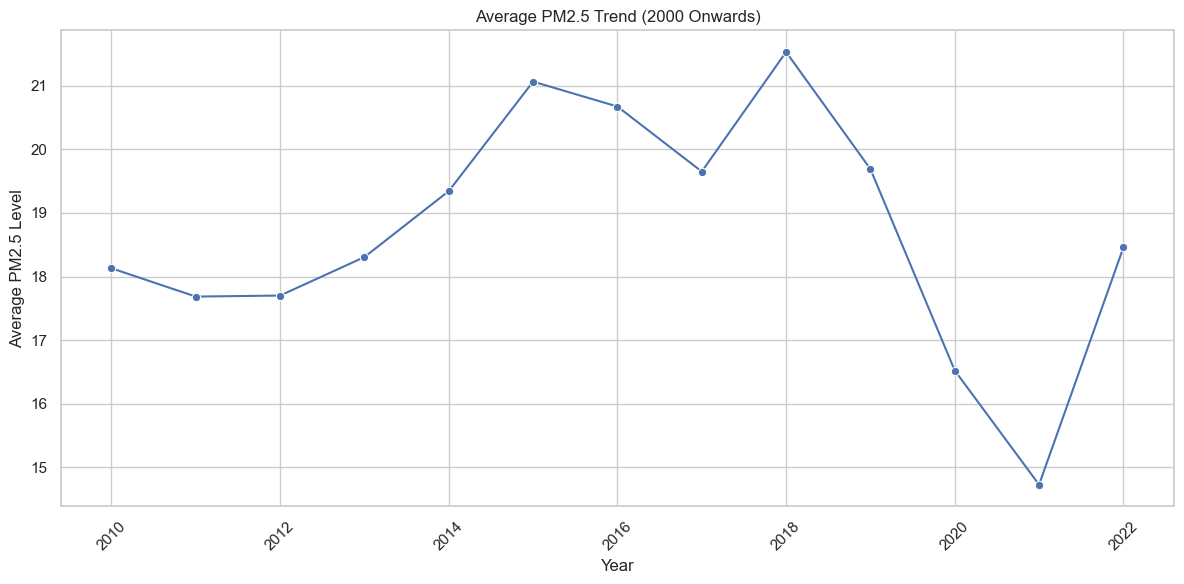

In [90]:
pm25_df = df[['year', 'pm25']].dropna()
pm25_df = pm25_df[pm25_df['year'] >= 2000]
pm25_avg = pm25_df.groupby('year', as_index=False)['pm25'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_avg, x='year', y='pm25', marker='o')
plt.title('Average PM2.5 Trend (2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

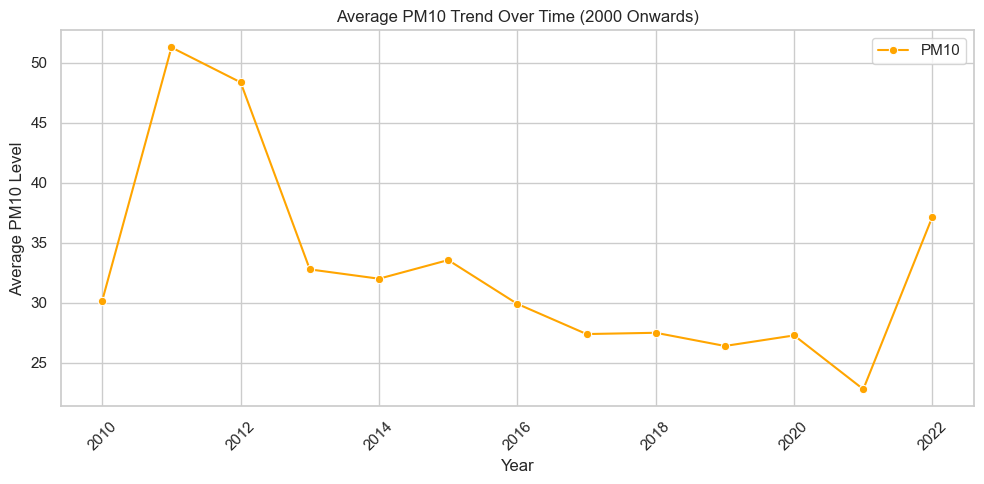

In [91]:
# PM10 analysis
pm10_df = df[['year', 'pm10']].dropna()
pm10_df = pm10_df[pm10_df['year'] >= 2000]
pm10_avg = pm10_df.groupby('year', as_index=False)['pm10'].mean()

# Plotting PM10
plt.figure(figsize=(10, 5))
sns.lineplot(data=pm10_avg, x='year', y='pm10', label='PM10', color='orange',marker="o")
plt.title('Average PM10 Trend Over Time (2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Average PM10 Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

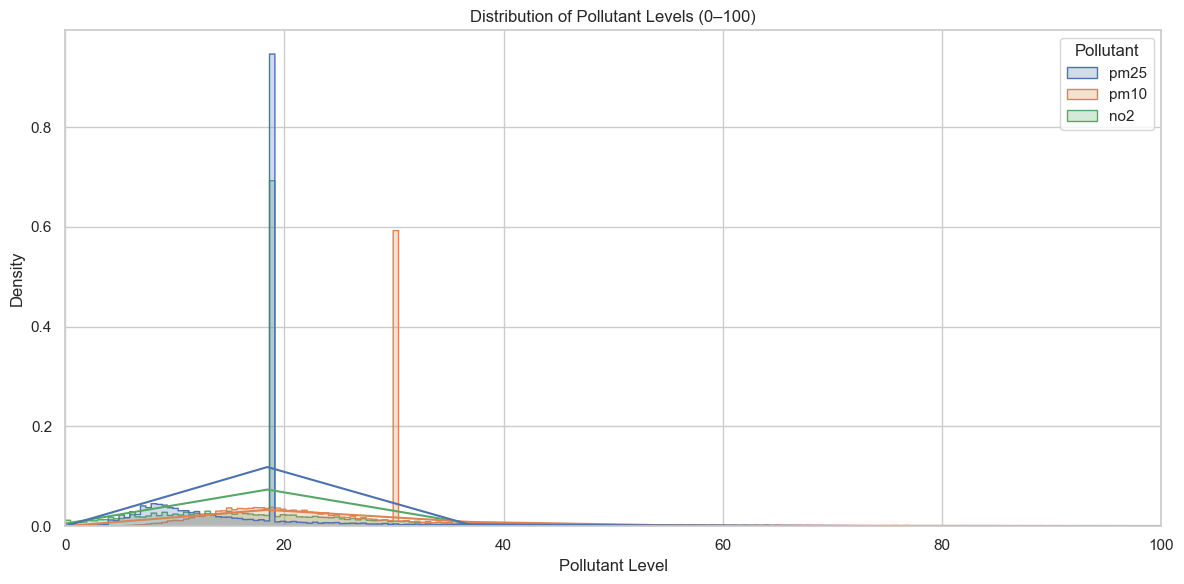

In [92]:
pollutant_columns = ['pm25', 'pm10', 'no2']

available_pollutants = [col for col in pollutant_columns if col in df.columns]

melted_df = df[available_pollutants].melt(var_name='Pollutant', value_name='Level')

melted_df = melted_df.dropna()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    data=melted_df,
    x='Level',
    hue='Pollutant',
    kde=True,
    element='step',
    stat='density',
    common_norm=False
)
plt.title('Distribution of Pollutant Levels (0–100)')
plt.xlabel('Pollutant Level')
plt.ylabel('Density')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

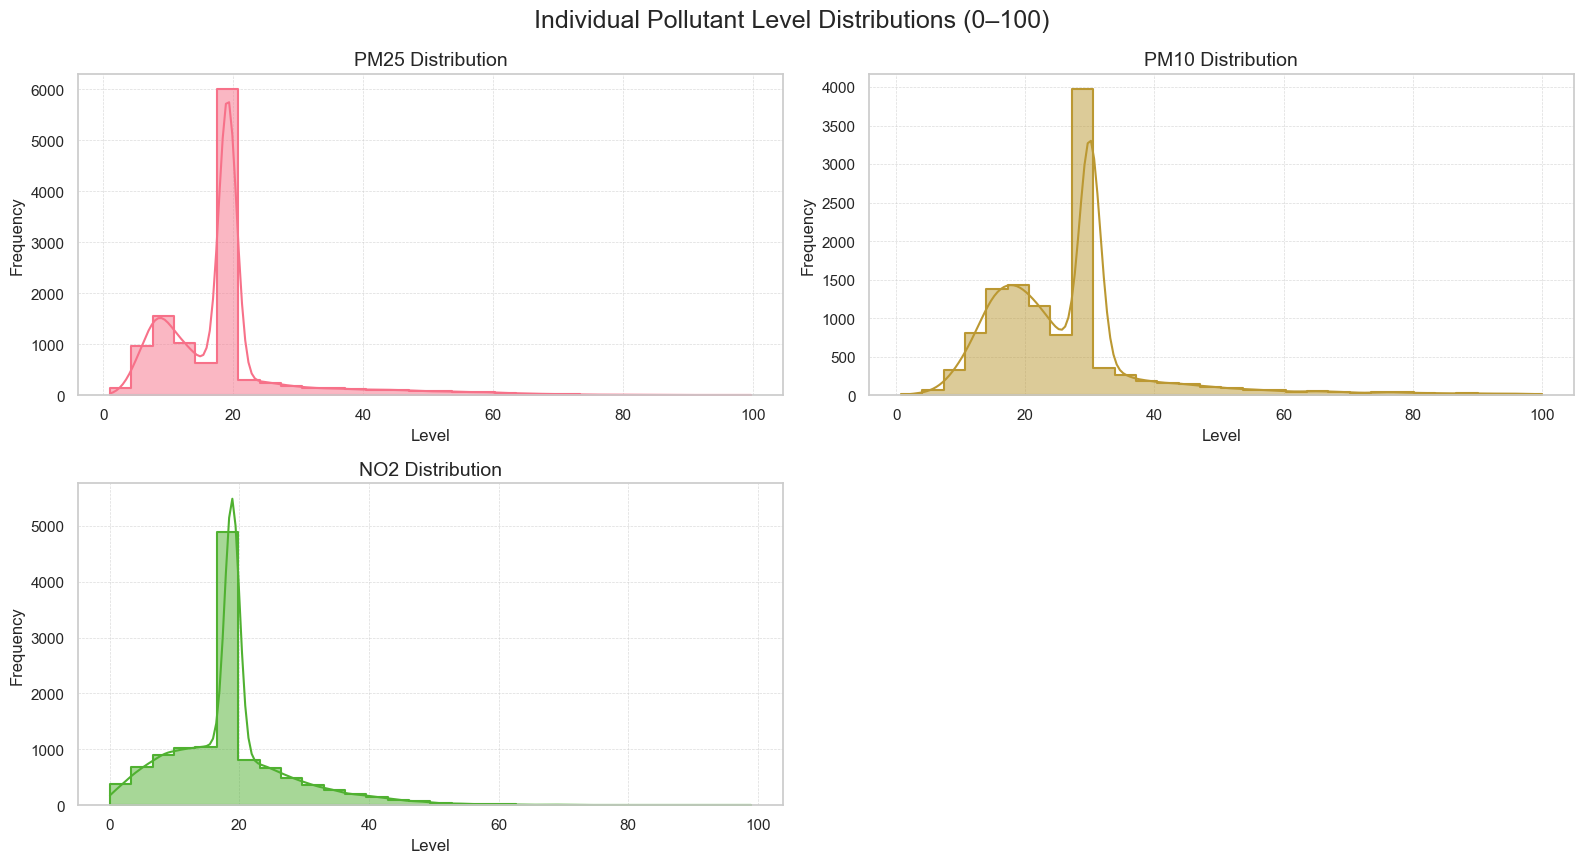

In [93]:
plt.figure(figsize=(16, 12))
for i, pollutant in enumerate(available_pollutants, 1):
    plt.subplot(3, 2, i) 
    sns.histplot(
        data=df[df[pollutant] <= 100], 
        x=pollutant,
        kde=True,
        bins=30,
        color=sns.color_palette("husl")[i - 1],
        stat="frequency",
        element="step",
        fill=True,
        alpha=0.5,
        linewidth=1.5
    )
    plt.title(f'{pollutant.upper()} Distribution', fontsize=14)
    plt.xlabel('Level')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.suptitle("Individual Pollutant Level Distributions (0–100)", fontsize=18, y=1.02)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_4380\708347335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


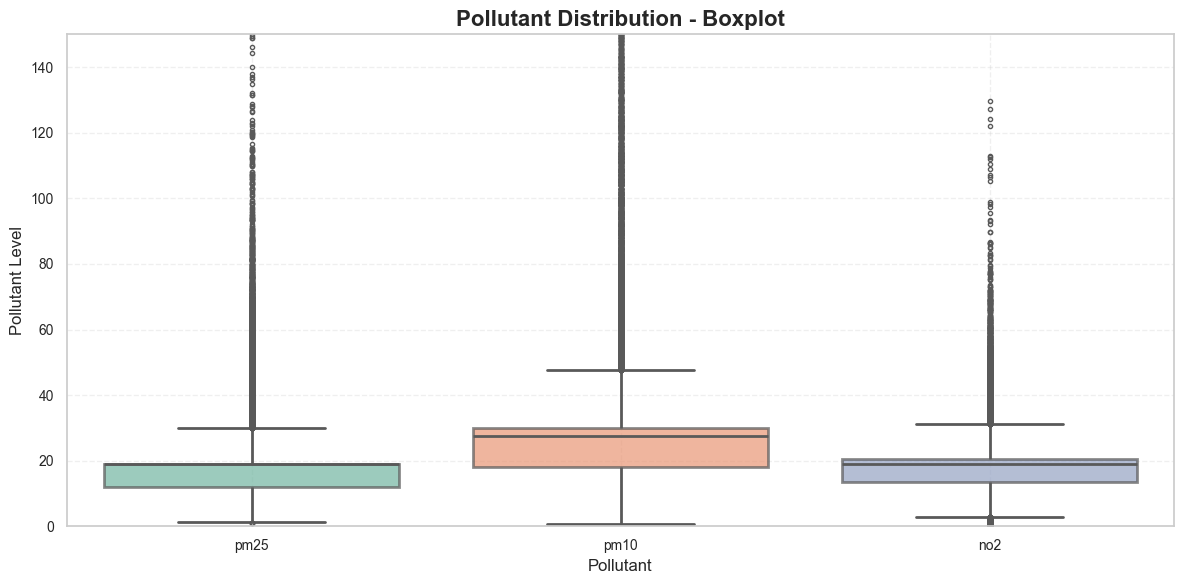

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Pollutant',
    y='Level',
    data=melted_df,
    palette='Set2',
    linewidth=2,
    fliersize=3,
    boxprops=dict(alpha=0.7)
    
)
plt.ylim(0,150)
plt.title('Pollutant Distribution - Boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Pollutant', fontsize=12)
plt.ylabel('Pollutant Level')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

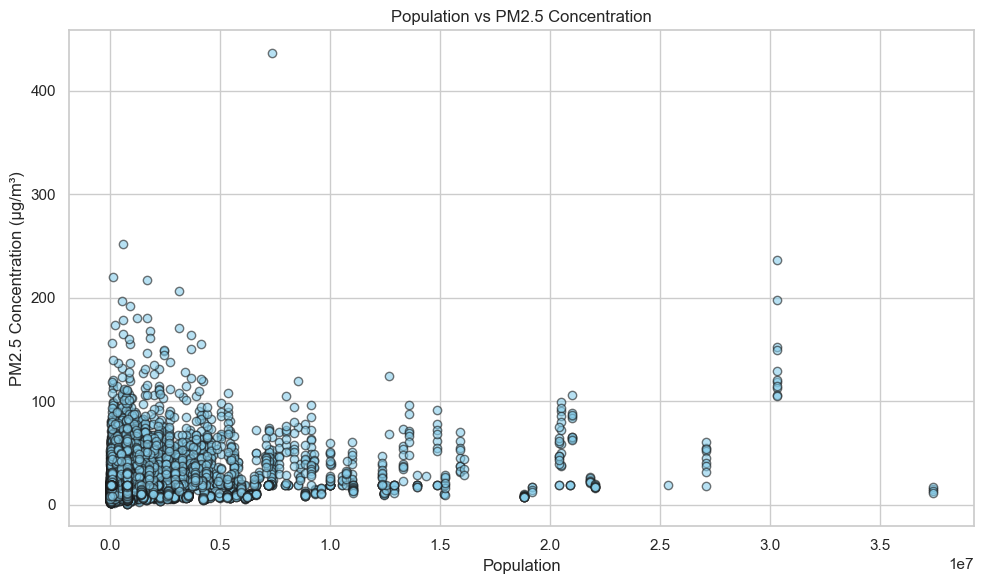

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['pm25'], alpha=0.6, c='skyblue', edgecolors='k')
plt.title('Population vs PM2.5 Concentration')
plt.xlabel('Population')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


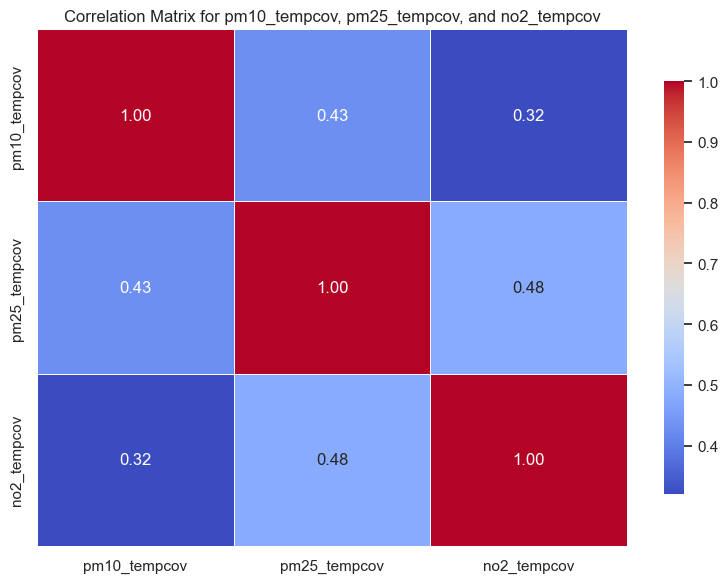

In [96]:
pollutant_tempcov_columns = ['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']

df_tempcov = df[pollutant_tempcov_columns].dropna()

correlation_matrix = df_tempcov.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix for pm10_tempcov, pm25_tempcov, and no2_tempcov')
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4380\1655773640.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='avg_pollution', y='country_name', palette='flare')


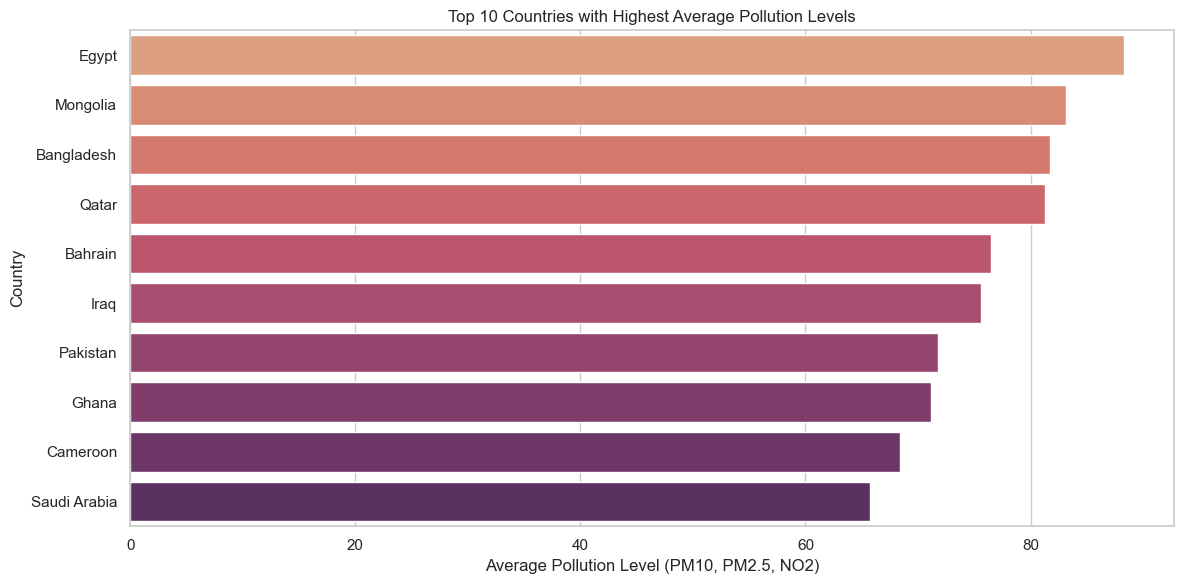

In [97]:
df['avg_pollution'] = df[['pm10', 'pm25', 'no2']].mean(axis=1, skipna=True)

country_pollution = df.groupby('country_name', as_index=False)['avg_pollution'].mean()

top_10_countries = country_pollution.sort_values(by='avg_pollution', ascending=False).head(10)

# Plotting top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_countries, x='avg_pollution', y='country_name', palette='flare')
plt.title('Top 10 Countries with Highest Average Pollution Levels')
plt.xlabel('Average Pollution Level (PM10, PM2.5, NO2)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()